In [425]:

import numpy as np
from zeta import *
from root_finding_final import *
from derivative_rg import *

np.set_printoptions(precision=5, threshold=7000,suppress=False, linewidth=1000)

NotImplementedError: 

In [11]:
def file_location(d_vec = np.array([0,0,1]), ML = 4): 
    d_vec = np.array(d_vec)
    directory = "roots_zeta/ML_{}/".format(ML)

    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    path = directory+ folder_name + "/data.npz"
    return path



In [7]:

def plot_nice(q_2, z_d_results,asymptotes, zeros,  d_vec ):
    z_d_plot = np.copy(z_d_results)
    q_2_plot = np.copy(q_2)
    first_asymptotes = np.copy(asymptotes)
    #plt.figure(figsize = (40,6))
    ###########Creates Plots#####################  


    #z_d_plot[z_d_plot<(-1e-5)] = np.nan


    plt.plot(q_2_plot, z_d_plot, label = "z_d", linewidth = 1)
    # #insert first asymptotes with black dotted lines, thickness 1 pt
    for i in first_asymptotes:
        plt.axvline(i, linestyle = "--", color = "black", linewidth = 1, label = "Asymptotes")

    #insert zeros with red dotted lines, thickness 1 pt
    for i in zeros:
        plt.axvline(i, color = "red", linewidth = 1, label = "Zeros")

    #label
    plt.xlabel("q^2")
    plt.ylabel("z_d")
    #plt.title("First {} zeros of $z^d$ vs $q^2$ for $d$ = {} ". format(len(zeros), d_vec))

    plt.xlim(0,first_asymptotes[-1])

    #legend
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(labels, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')


    plt.ylim(-50,50)
    #tickmarks

    #set x tickmarks, 100
    max_x = first_asymptotes[-1]
    steps = np.ceil(max_x/50)
    plt.xticks(np.arange(0,max_x, steps))

    plt.grid()



In [154]:
@np.vectorize
def KSS(d =0, alpha = 1,x  = 0):


    kappa = np.sqrt(10**(1.24)/alpha**(1.023))
    if kappa**2<100*x:
        kappa = np.sqrt(100*x)
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 
    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = gamma(x)*(kappa + omega_k * beta(x))

    Xi_sq = Xi**2

    return Xi_sq #-1e5


In [396]:
from math import comb
from math import gamma as gam_f


@np.vectorize
def lah(n,k):
    if n == 0 and k == 0:
        return 1
    if k<1 or n<1:
        return 0
    
    return (-1)**n*comb(n-1,k-1)*gam_f(n+1)/gam_f(k+1)


@np.vectorize 
def C_ij(n,i,j):
    if  i > n or j > n or j>i:
        return 0
    h = (i-j)
    return gam_f(h+j+1)*comb(n, h)*lah(n-h,j)
@np.vectorize
def K_ij(n, i,j, x,d):
    if d == 0:
        if i == n and j == 0:
            return gam_f(n+1)
        else:
            return 0
    if  i > n or j > n:
        return 0
    beta = np.sqrt(d**2/(4*x+1+d**2))
    return C_ij(n,i,j)*(2/d)**(2*(n+(j-i)))* beta**(2*(n+ 2*j-i))



In [400]:
I, J = np.meshgrid(np.arange(0,10), np.arange(0,10), indexing = "ij")
K_ij(3,I,J, 0.1, 1)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


array([[  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     , -11.57407,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,  13.88889,  -9.64506,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  6.     , -12.5    ,   8.68056,  -2.00939,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.     ,   0.   

In [394]:
from scipy.special import hyp1f1, gamma, gammaincc
@np.vectorize 
def Integrals(a,b,x,alpha):
    if a != b:
        return 0
        
    initial = (1/(2 * (3 + 2 * b))) * np.exp(x * alpha) * np.pi * (alpha**(-1/2 + a - b))
    part1 = (3 + 2*b - 2*x * alpha) * hyp1f1(3 + a, 1/2 + a - b, -x * alpha) / gamma(1/2 + a - b) 
    part2 = x * alpha * hyp1f1(3 + a, 3/2 + a - b, -x * alpha) / gamma(3/2 + a - b)

    result = initial * (part1 + part2) * (-1)**(a-b) 

    if b == 0:
        other = 2
    else:
        other = 1/b

    return 2*np.pi*result * other

In [363]:
Integrals(a = 1, b = 0, x = 0, alpha = 1)


array(0)

In [409]:
def g(a = 1, b = 1, x = 0 ,dx = 0,dy = 0,dz = 1, alpha = 0.1, cutoff = 2e4):
    
    '''
    Outputs derivative of the zeta correctly **ONLY** for d = [0,0,0] 
    where the expression is trivial to evaluate for all s derivatives.
    Crucially, this does not include the s! factor, for convenience
    when taylor expanding.
    d ≠ 0 can be evaluated but will be some approximation of the true result

    The inputs are x, the cutoff, the derivative order s and d
    '''

    # if a -b >1/2 the sum converges, so we can set alpha = 0
    if a == b+1:
        #this cutoff was set to have a rough error of 1e-5
        #cutoff = 2e4
        #print("yes")
        alpha = 0
    if a>b+1:
        cutoff = 1e2
        alpha = 0


    d = np.array([dx,dy,dz])
    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    
    d_scalar = np.linalg.norm(d)
    s = 4*x + m_tilde_sq
    E = np.sqrt(d_scalar**2 + 4*x + m_tilde_sq)
    if d_scalar:
        beta_norm = d/np.linalg.norm(d)
        beta = d_scalar/E
        gamma = 1/np.sqrt(1-beta**2)
    else:
        beta_norm = d
        beta = 0
        gamma = 1


    #create spherical shell containing the n vectors
    rng = np.arange(-int(np.sqrt(cutoff))-1, int(np.sqrt(cutoff))+2)
    res = (rng[:,np.newaxis, np.newaxis]**2+rng[np.newaxis,:,np.newaxis]**2+rng[np.newaxis,np.newaxis,:]**2)
    X,Y,Z = np.meshgrid(rng,rng,rng, indexing = 'ij')
    coords = np.stack((X,Y,Z), axis=3)
    r = coords[res<=cutoff]


    ####### Use Rummakainen and Gottlieb's formula
    r_2 = np.einsum("ij,ij->i", r,r)
    r_parallel  = np.einsum("ij,j->i", r, beta_norm)
    #use braodcasting to multiply each of the dot products by the beta unit vector
    r_perp_sq = r_2 -r_parallel**2
    rho = r_parallel+ 1/2 * d_scalar
    r_parallel_star = 1/gamma*(rho)
    r_parallel_star_sq = r_parallel_star**2
    r_sq = r_parallel_star_sq+ r_perp_sq
    D = r_sq-x


    terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
    return np.sum(terms_2)#/np.sqrt(4*np.pi)

In [364]:
def deltaFV(a,b,x,dx,dy,dz,alpha, cutoff, gam):
    if(b>a):
        return 0
    elif (a==0 and b==0):
        return 0
    return (g(a,b,x,dx,dy,dz,alpha, cutoff)-gam**(2*b+1)*Integrals(a,b,x,alpha))

In [405]:
n_max = 3
I, J = np.mgrid[0:n_max+1, 0:n_max+1]  
print(J)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]


In [406]:
def derivs(n_max, d_vec, x, alpha, cutoff):
    d = np.linalg.norm(d_vec)
    ML = 4
    m_tilde_sq = (ML/np.pi)**2
    beta = np.sqrt(d**2/(4*x+m_tilde_sq+d**2))
    gam = np.sqrt(1/(1-beta**2))
    dx, dy,dz = d_vec[0], d_vec[1], d_vec[2]

    FV_matrix = np.zeros((n_max+1,n_max+1))
    for i in range(n_max+1):
        for j in range(n_max+1):
            FV_matrix[i,j] = deltaFV(i,j,x,dx,dy,dz,alpha, cutoff, gam)

    I, J = np.mgrid[0:n_max+1, 0:n_max+1]  

    #print(FV_matrix)

    derivatives = np.array([])
    for n in range(1,n_max+1):
        K = np.array(K_ij(n,I,J,x,d))

        D_n = K* FV_matrix
        derivatives = np.append(derivatives,np.sum(D_n ))

    print(K)
    return derivatives/np.sqrt(4*np.pi)
    

In [408]:
derivs(1, np.array([0,0,0]), 0.1, 0.1, 1e4) 

alpha 0
alpha 0.1
[[0 0]
 [1 0]]


array([33.37876])

# On to User defined inputs

All plotting will be done below

In [357]:
d_vec = np.array([0,0,0])

In [358]:
data = np.load(file_location(d_vec))
zeta_d = data["z_d_results"]
asymptotes = data["asymptotes"]
zeros = data["zeros"]
q_2 = data["q_2"]


In [370]:

q_derivatives = np.linspace(0,3, 300)


#q_derivatives = q_2[:-1] + dx/2
accurate_deriv = np.zeros_like(q_derivatives)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx
#plt.ylim(-50,50)

#q_derivatives = q_2[:-1] + dx/2

for i in range(len(q_derivatives)):
    accurate_deriv[i] = derivs(1, d_vec, q_derivatives[i], 0.1, 1e4)


alpha 0


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_81221/1188612264.py:62: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)


alpha 0.1


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_81221/1188612264.py:62: RuntimeWarning: invalid value encountered in multiply
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)


alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
alpha 0.1
alpha 0
al

KeyboardInterrupt: 

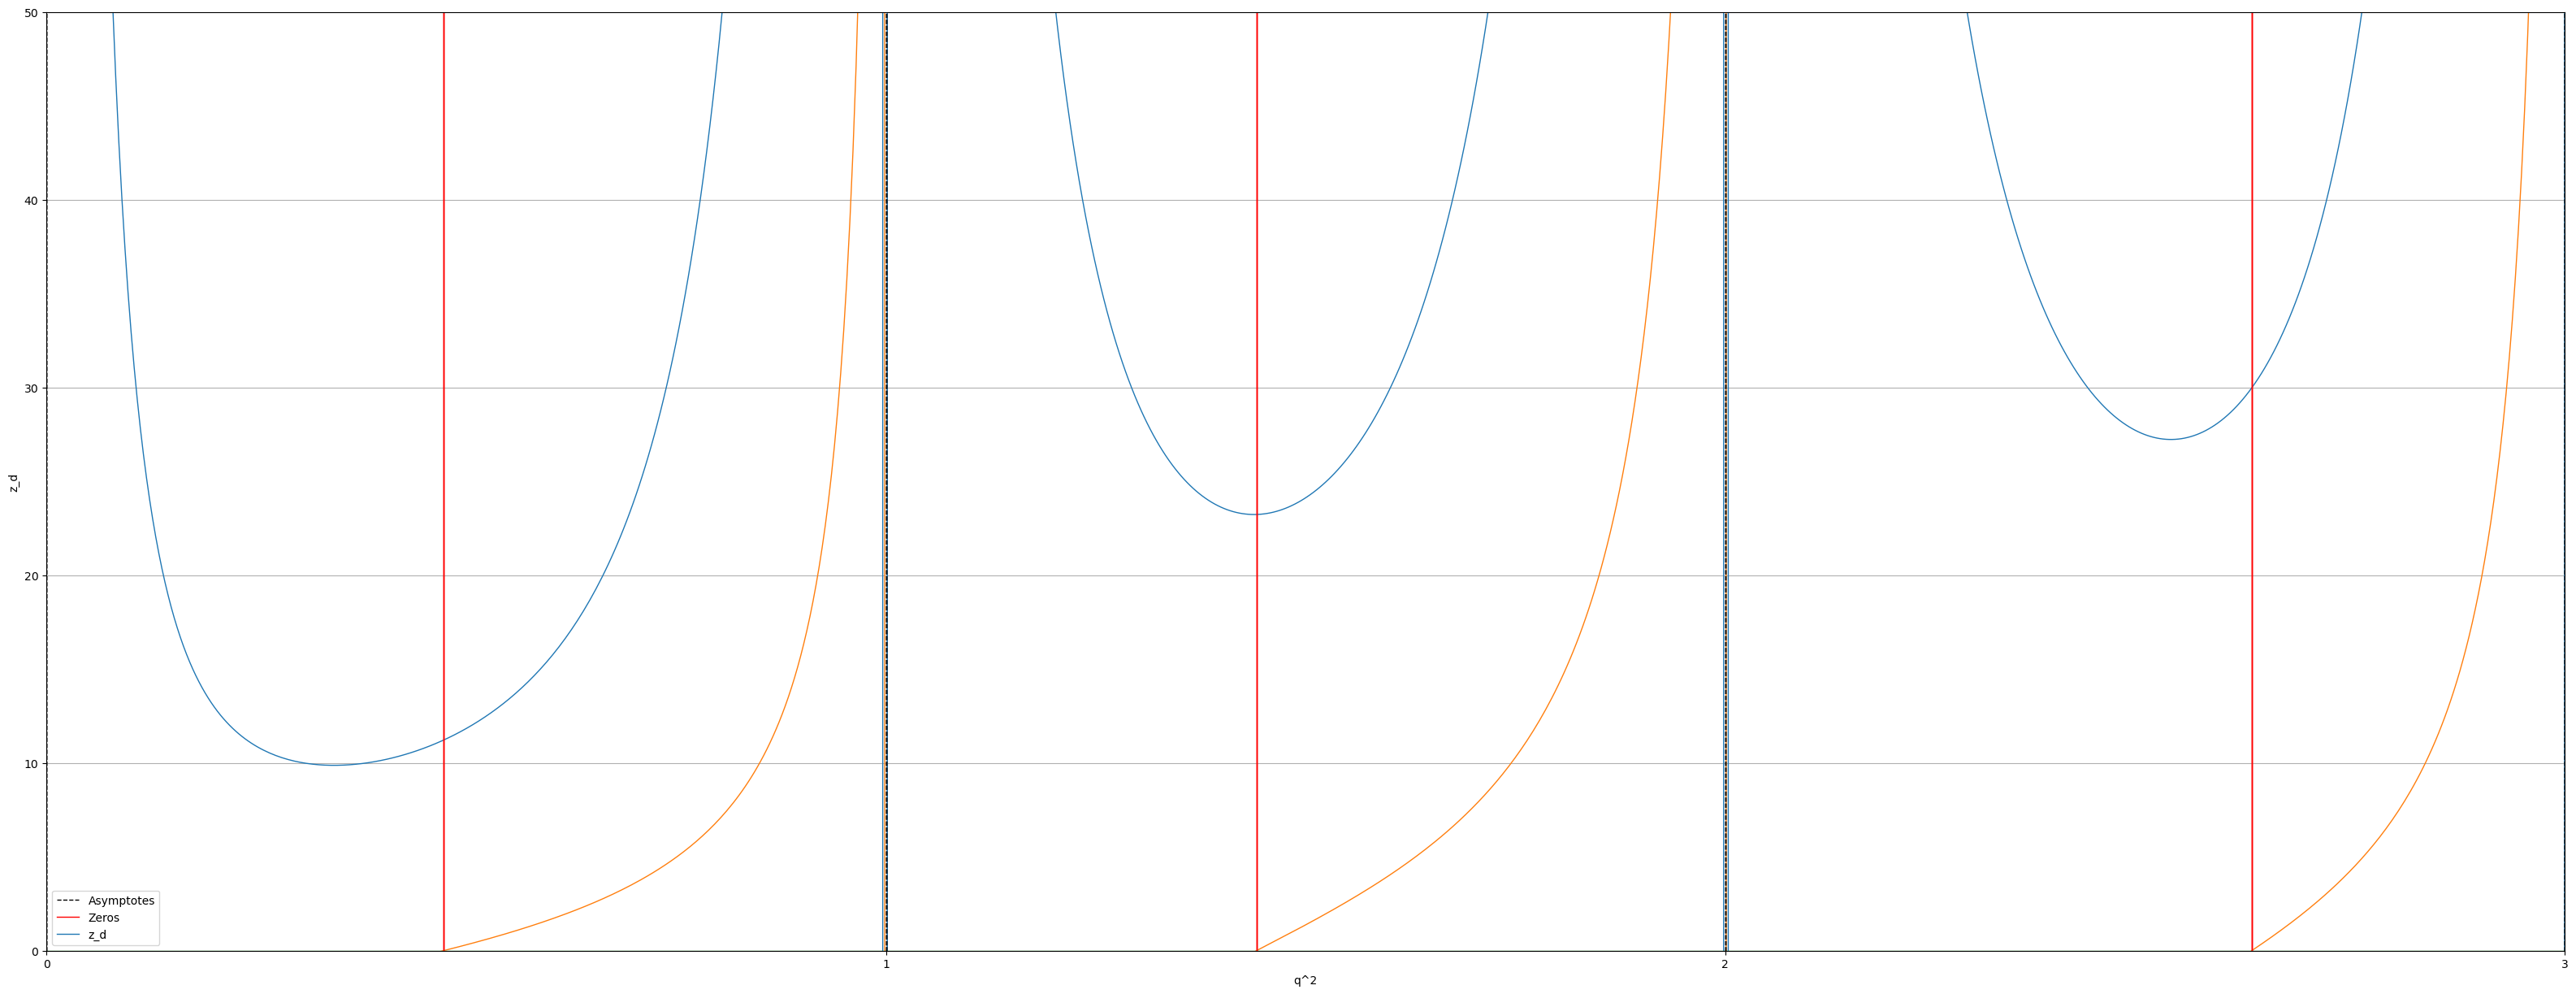

In [366]:
plt.figure(figsize = (40,15))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)
plot_nice(q_derivatives, accurate_deriv, asymptotes, zeros, d_vec)





plt.ylim(-0,50)

plt.xlim(0,3)




plt.show()



(-5.0, 5.0)

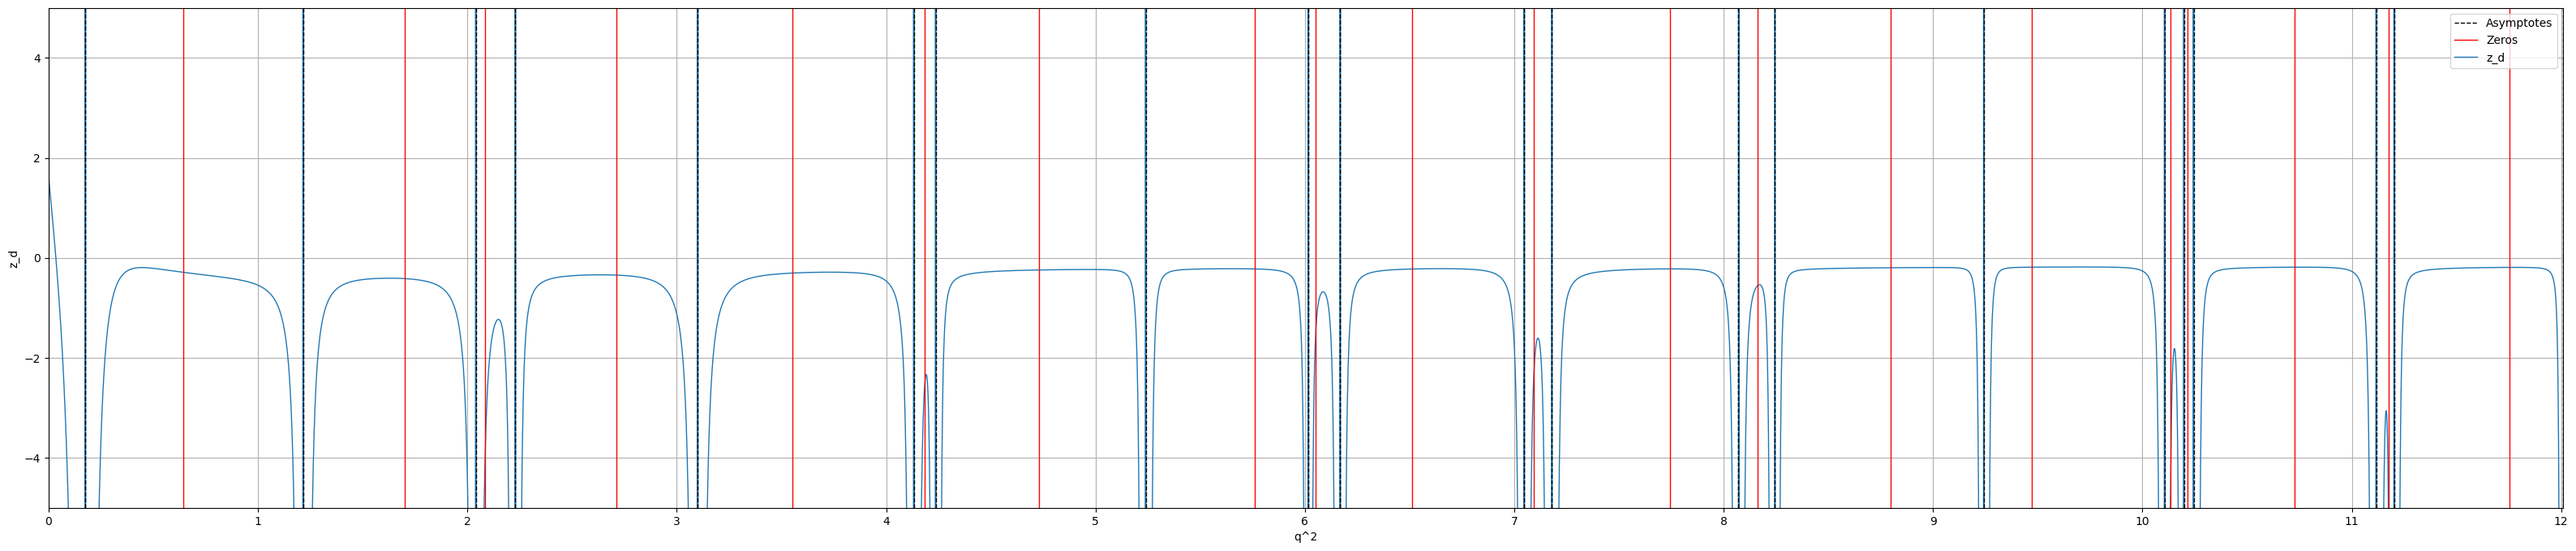

In [277]:
plt.figure(figsize = (40,8))

plot_nice(q_2[:-1] + dx/2, accurate_deriv-dy_dx, asymptotes, zeros, d_vec)
plt.ylim(-5,5)

# Stability Analysis


The above seems to work rather well, which means we can maybe proceed with convergence plots, much like for the roots. FOr that we will plot the converegence of the derivative at one of the roots. 

In [184]:

KSS = np.vectorize(KSS)


def stability_analysis(d_vec = np.array([0,0,0]), alpha=0.01, resolution=6, ML = 4):



    directory = "roots_zeta/ML_{}/".format(ML)
    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    data = np.load(directory+folder_name+"/data.npz")


    zeros_before = data["zeros"][0:6]
    asymptotes_before = data["asymptotes"]
    lower_asy = asymptotes_before[:-1]
    upper_asy = asymptotes_before[1:]

    d_sq = np.linalg.norm(d_vec)**2
    kappas = KSS(d_sq, alpha, zeros_before)

    #for meshgrid
    alpha_min = np.log10(alpha)-1/2
    alpha_max = np.log10(alpha)+1/2
    alphas = np.logspace( alpha_min,alpha_max, resolution)
    d1, d2, d3 = d_vec[0], d_vec[1], d_vec[2]


    ALPHA_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    CUTOFF_TOTAL = np.zeros((len(zeros_before), resolution, resolution))
    Z_TOTAL = np.zeros((len(zeros_before), resolution, resolution))



    for i in tqdm(range(len(zeros_before))):
        ot_mins = np.log10(kappas[i])-1
        ot_maxs = np.log10(kappas[i])+1
        cutoffs = np.logspace(ot_mins, ot_maxs, resolution)
        ALPHAS, CUTOFFS = np.meshgrid(alphas, cutoffs)
        Z = np.zeros_like(ALPHAS)
        
        for j in range(resolution):
            for k in range(resolution):
                Z[j,k] = np.abs(derivs(1, d_vec,zeros_before[i], ALPHAS[j,k], CUTOFFS[j,k] ))
        
        ALPHA_TOTAL[i] = ALPHAS
        CUTOFF_TOTAL[i] = CUTOFFS
        Z_TOTAL[i] = Z
        

    #fig, axs = plt.subplots(5, 4, figsize=(30, 25))
    fig, axs = plt.subplots(3, 2, figsize=(30, 25))
    # Iterate over the columns of all_roots
    for i in range(len(zeros_before)):
        # Calculate the row and column indices for the subplot
        row = i // 2
        col = i % 2
        
        alpha_min, alpha_max = np.log10(ALPHA_TOTAL[i].min()), np.log10(ALPHA_TOTAL[i].max())
        cutoff_min, cutoff_max = np.log10(CUTOFF_TOTAL[i].min()), np.log10(CUTOFF_TOTAL[i].max())
        extent = [alpha_min, alpha_max, cutoff_min, cutoff_max]
        # Plot each column in a separate subplot
        im = axs[row, col].imshow( (np.abs(Z_TOTAL[i])), aspect='auto', origin='lower', extent=extent, interpolation='none' )
        axs[row, col].set_xlabel('$\log_{10}\left(\\alpha\\right)$')
        axs[row, col].set_ylabel('$\log_{10}\left(\Xi^2\\right)$')
        axs[row, col].set_title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))
        axs[row, col].scatter(np.log10(alpha), np.log10(kappas[i]), c = "r", s = 100, marker = '+')  # Add red point
        fig.colorbar(im,ax=axs[row, col])
    # Add colorbar


    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # Show the plot
    fig.suptitle(f'Deriv Stability for $\\vec d  = {{{d_vec}}}$ \n Results given as $\log_{{10}}\left( \left|{{U_i-U_i(\\alpha, \Xi^2)}}\\right|\\right)$ ', fontsize=20)





100%|██████████| 6/6 [03:05<00:00, 30.93s/it]


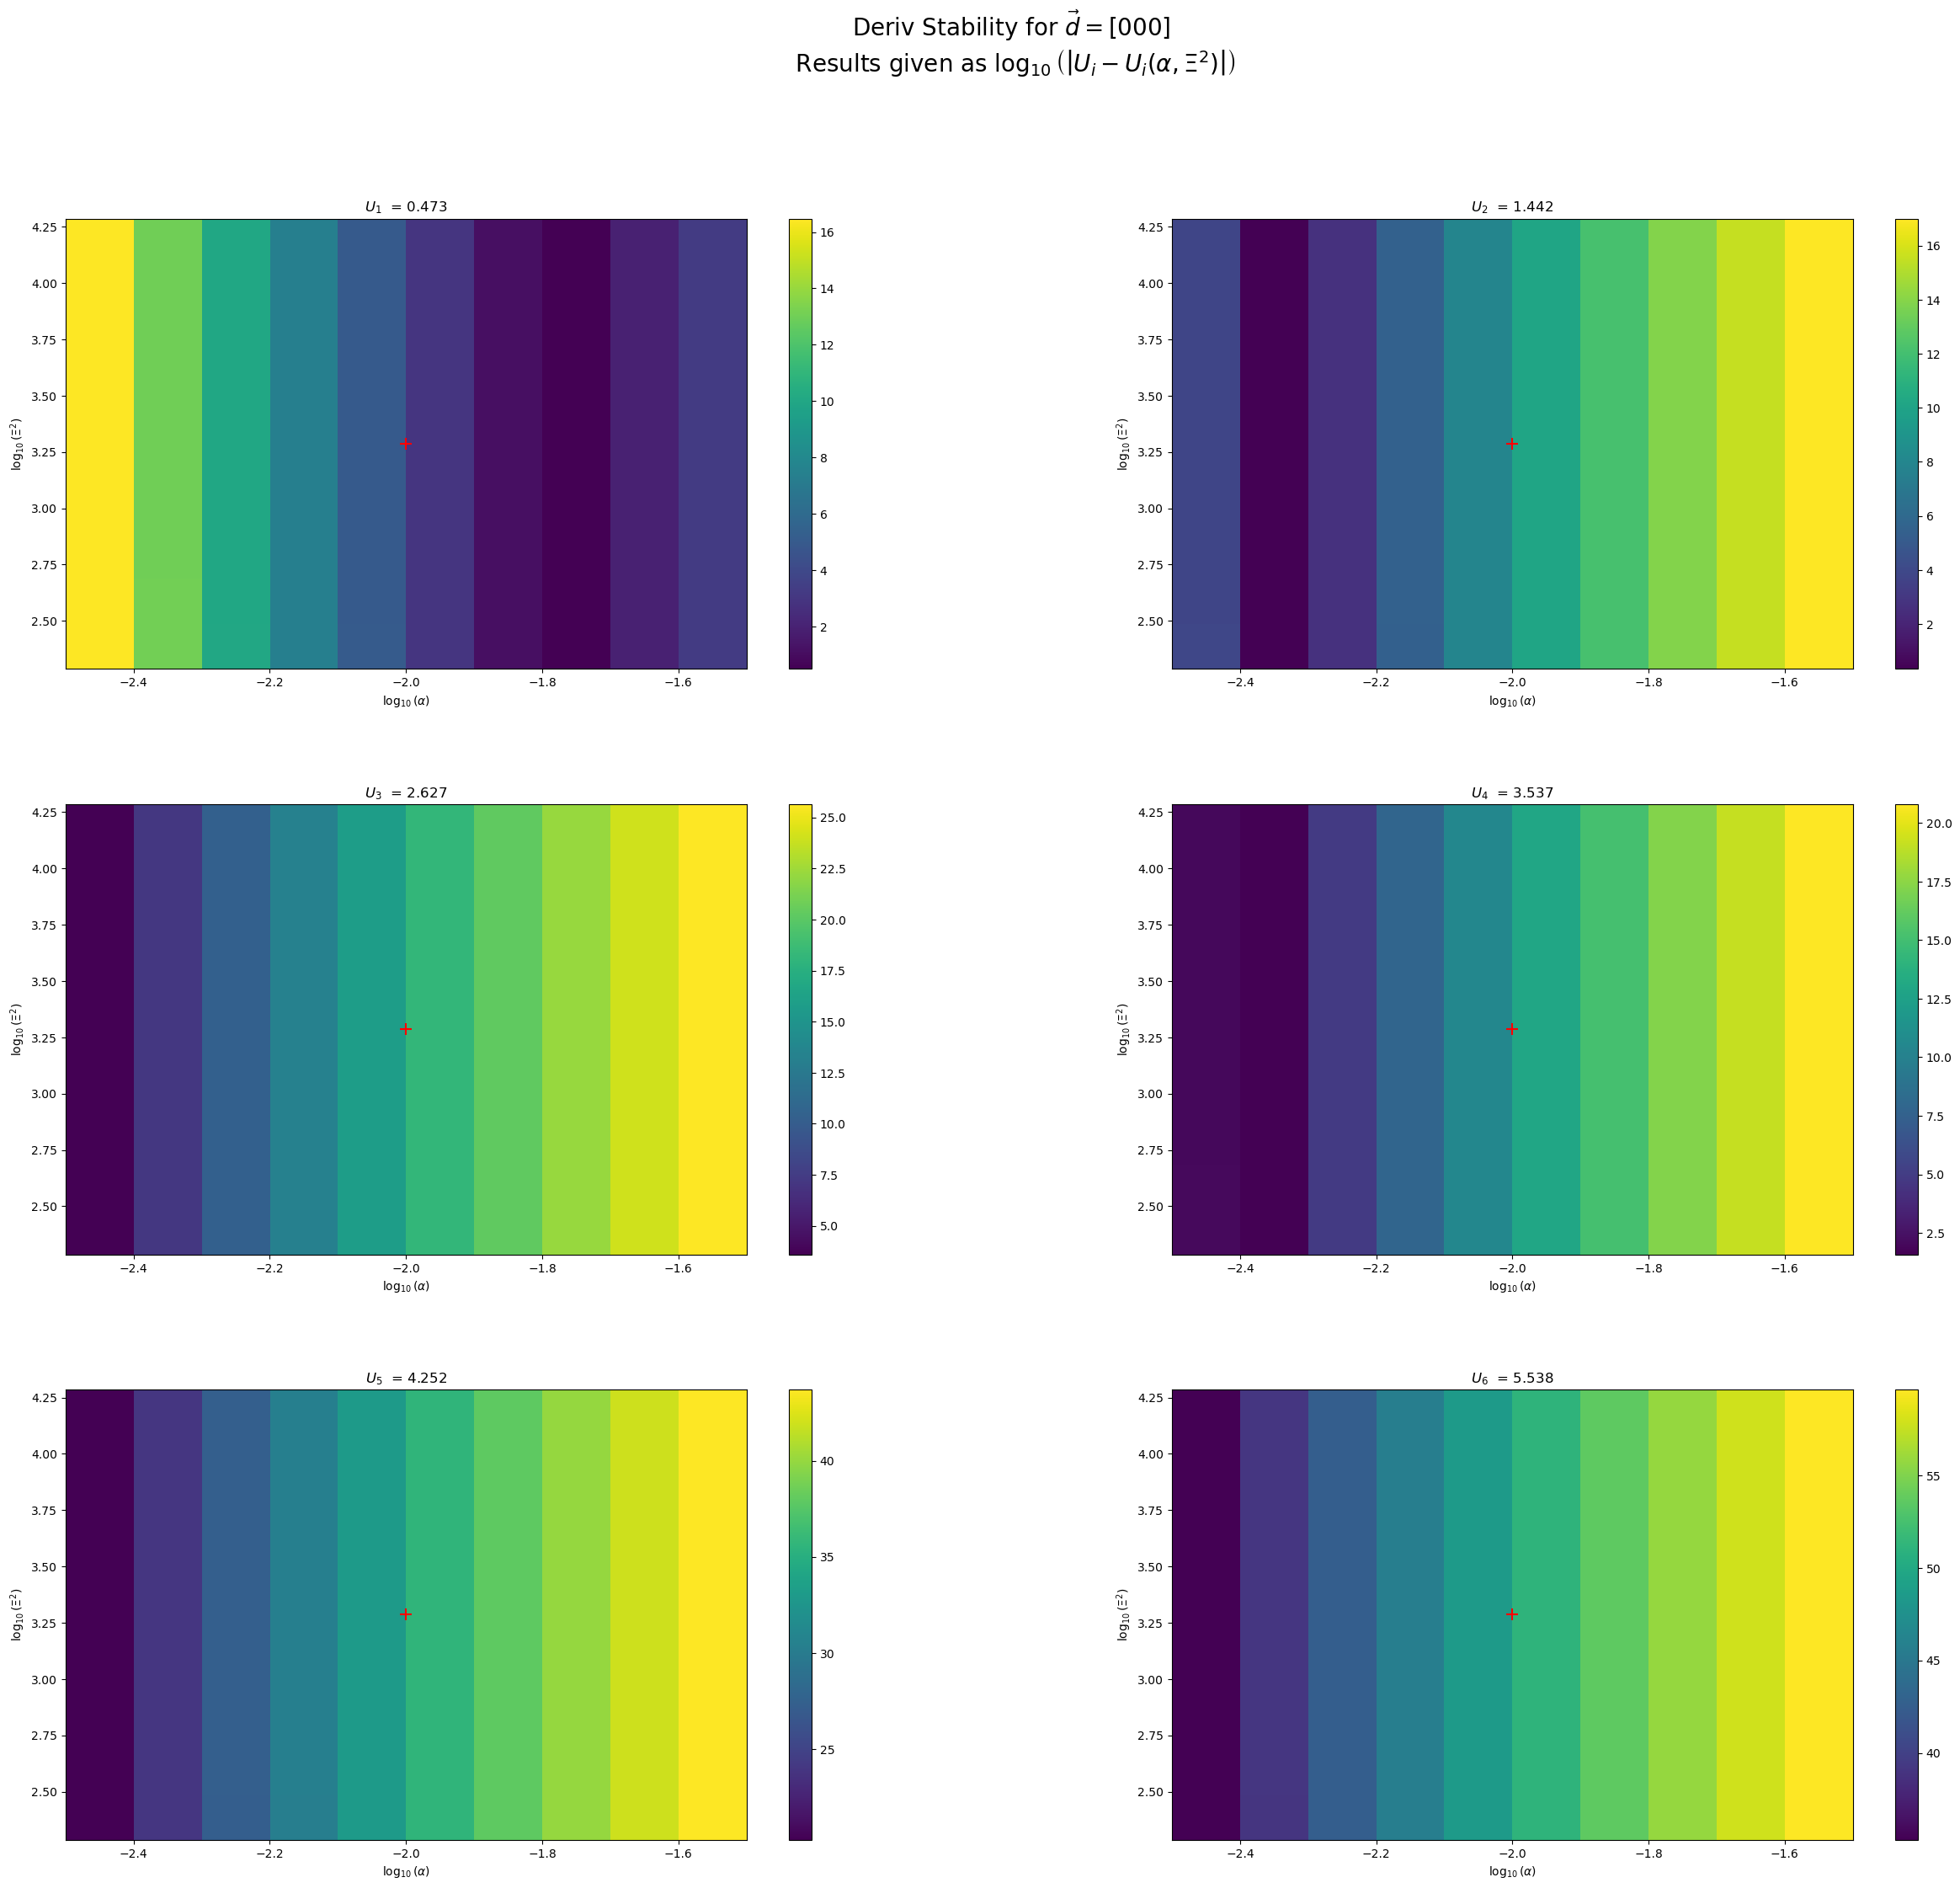

In [186]:
d_vec = np.array([0,0,0])
alpha = 0.01
resolution = 10

stability_analysis(d_vec, alpha, resolution)

The problem here seems to be that there is too much alpha dependence. We need to remove some of this dependence, in order to get a proper limiting value. We will do that by removing the integrals from the sums that converge.

# Modifying the code to remove alpha dep on converging sums

In [199]:

A,B = np.mgrid[0:5, 0:5]  



In [208]:
#print(Integrals(A,B, 0, 0.0))

A_B = A-B

Mask = A_B>1/2
results = np.zeros_like(A_B, dtype = np.float64)
for i in range(5):
    for j in range(5):
        if Mask[i,j]:
            results[i,j]=Integrals(i,j, 0, 0.0)

print(results)



[[ 0.  0.  0.  0.  0.]
 [-0.  0.  0.  0.  0.]
 [ 0. -0.  0.  0.  0.]
 [-0.  0. -0.  0.  0.]
 [ 0. -0.  0. -0.  0.]]


In [212]:
Integrals(A,B, 0, 0.0)

/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_81221/2125761570.py:6: RuntimeWarning: divide by zero encountered in scalar power
  initial = (1/(2 * (3 + 2 * b))) * np.exp(x * alpha) * np.pi * (alpha**(-1/2 + a - b))


ZeroDivisionError: 0.0 cannot be raised to a negative power

In [243]:
g(2,1, 0, 0, 0, 1,0)

144.58758659109856

In [244]:
g(2,1, 0, 0, 0, 1,1, 5e4)

144.61373855627028

100%|██████████| 6/6 [00:04<00:00,  1.47it/s]


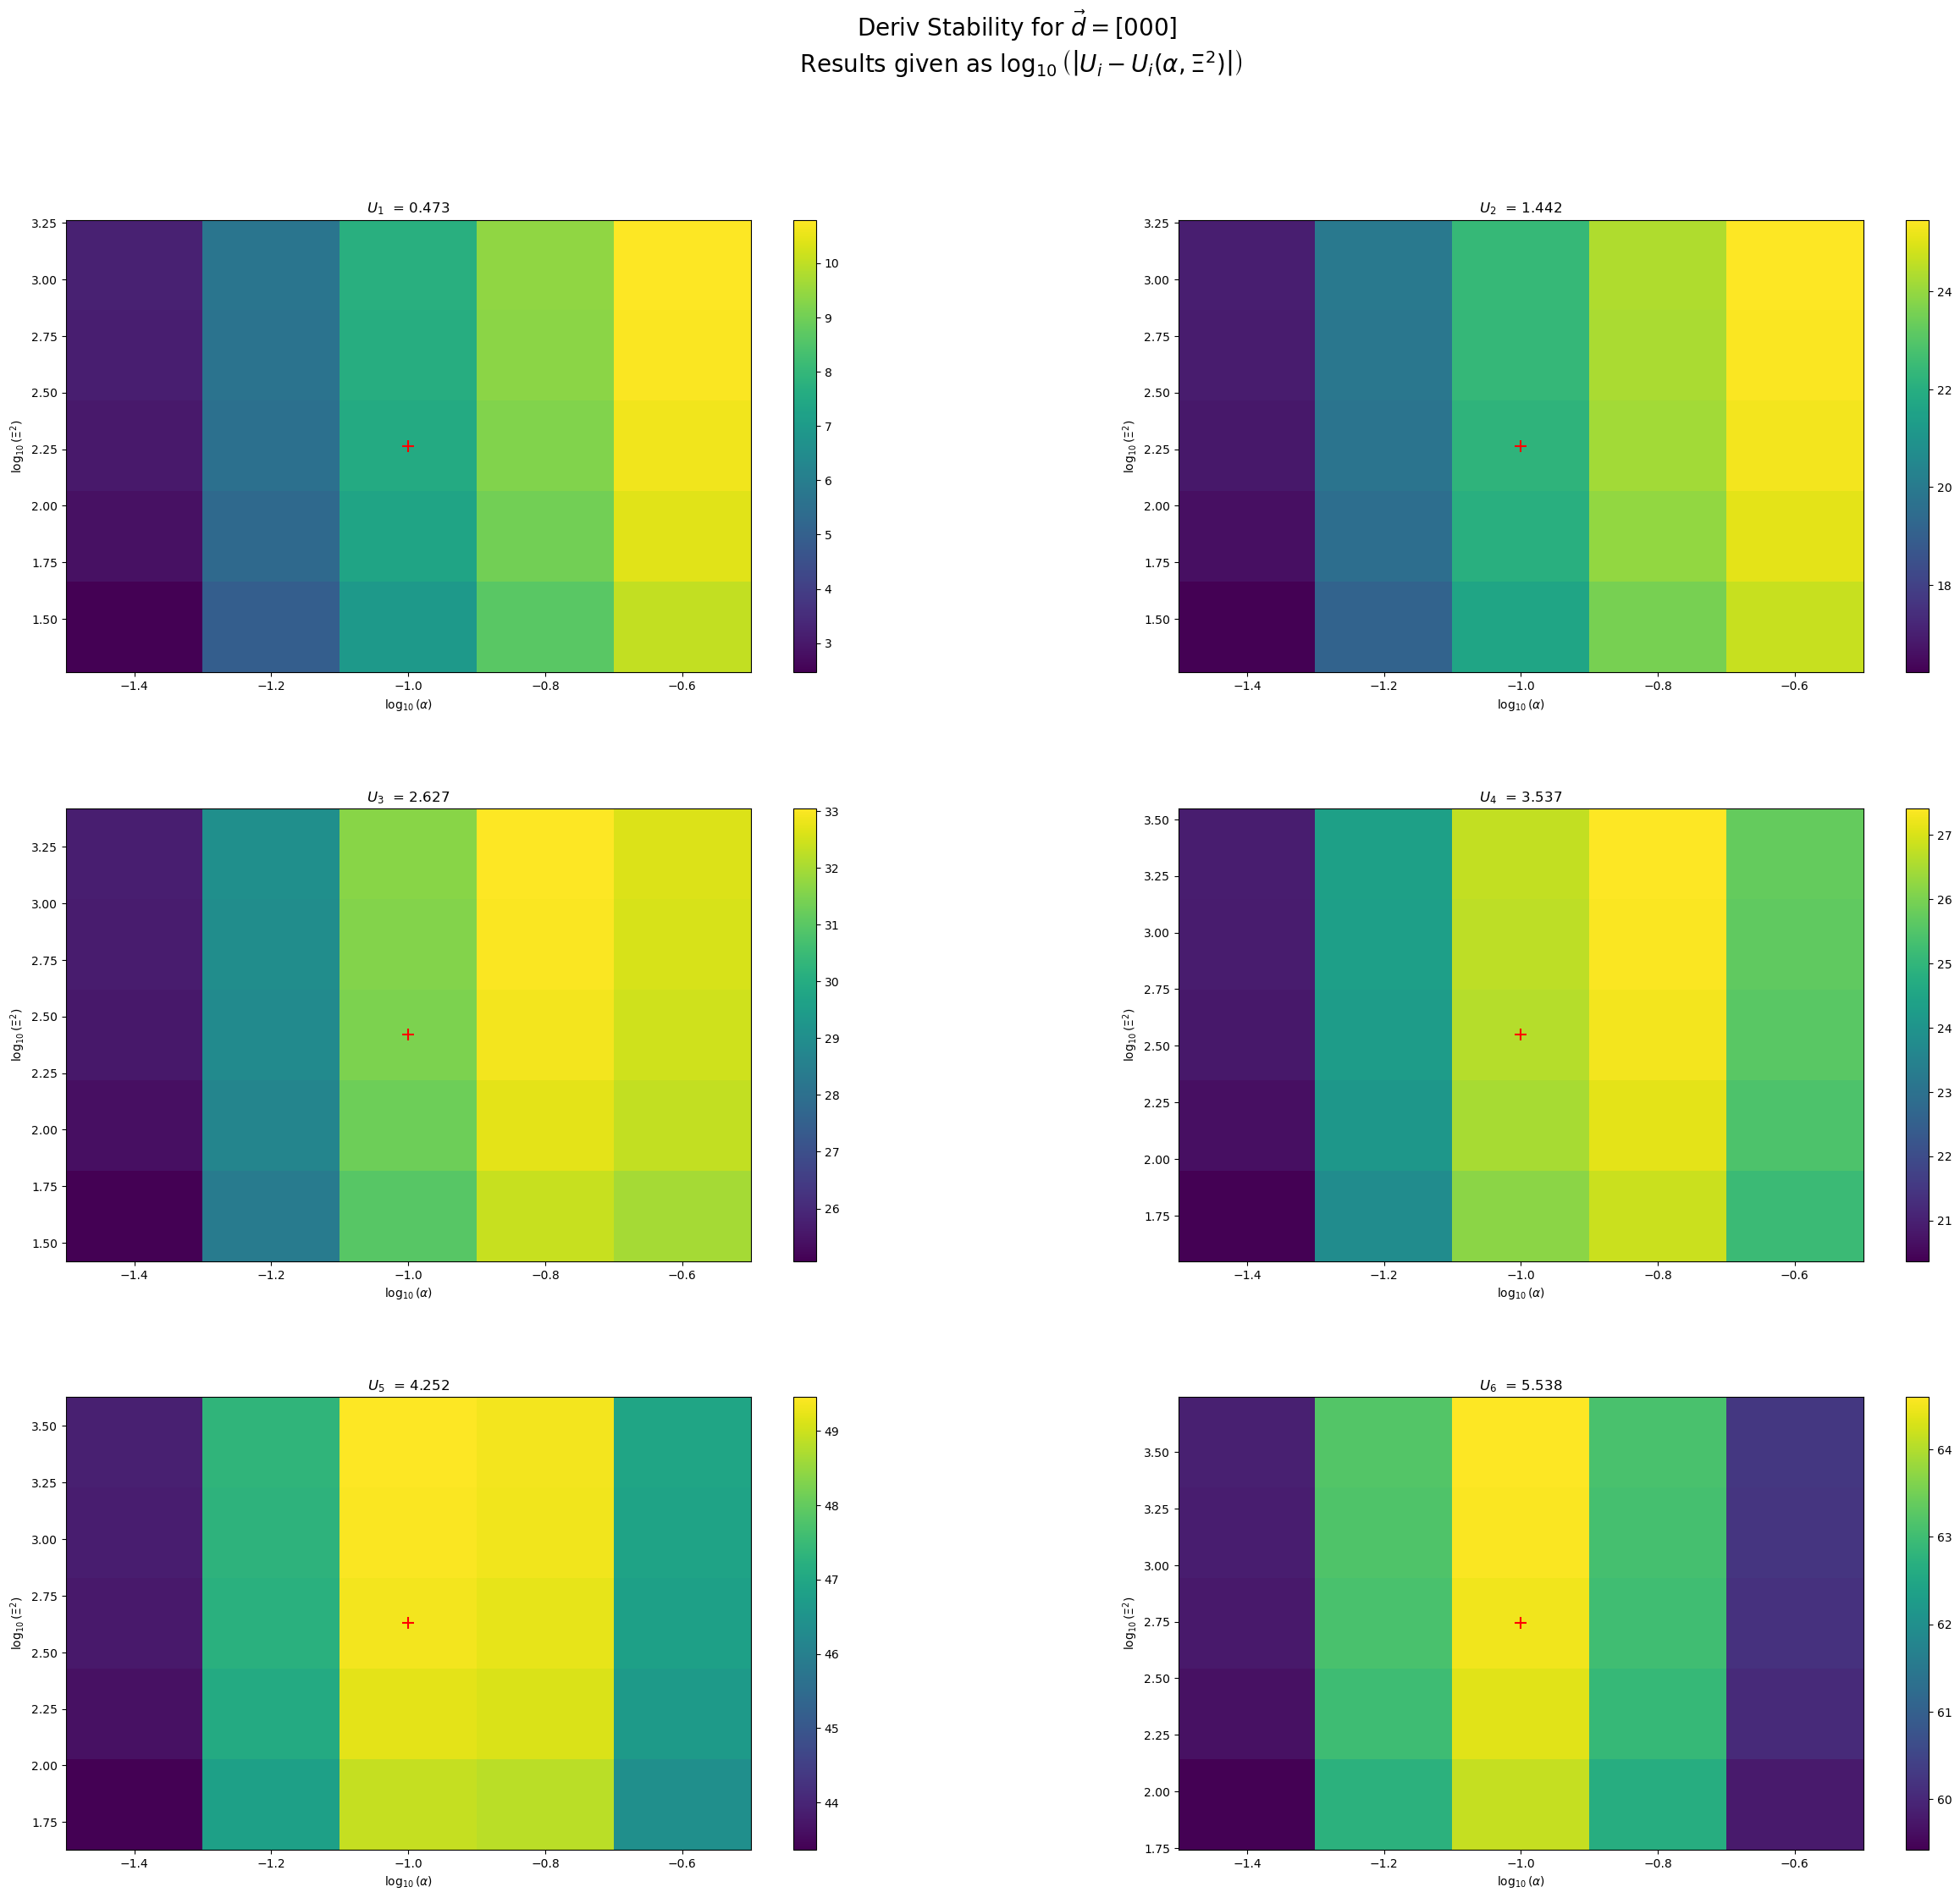

In [251]:
d_vec = np.array([0,0,0])
alpha = 0.1
resolution = 5
stability_analysis(d_vec, alpha, resolution)

# Convergence of the Derivative without the regulator

This means $\alpha$ is set to zero

In [312]:
zeros

array([ 0.6439411865305936,  1.7012504428040363,  2.0854433738068523,  2.713518882223661 ,  3.5505254301719726,  4.185215121272598 ,  4.728736710400854 ,  5.759542831694107 ,  6.049145597957986 ,  6.5130688627967075,  7.091992165467252 ,  7.744358997463657 ,  8.163386688229762 ,  8.79699052184005  ,  9.47171391876937  , 10.133914000633078 , 10.214815914899024 , 10.725492799424703 , 11.175135738060927 , 11.751970016360033 ])

In [351]:
#just the gs:



def gs(n_max=3,x=0,d_vec=np.array([1,0,0]),alpha = 0.1, cutoff = 1e4, ML = 4):
    d = np.linalg.norm(d_vec)
    m_tilde_sq = (ML/np.pi)**2
    beta = np.sqrt(d**2/(4*x+m_tilde_sq+d**2))
    gam = np.sqrt(1/(1-beta**2))

    dx, dy,dz = d_vec[0], d_vec[1], d_vec[2]

    g_matrix = np.zeros((n_max+1,n_max+1))
    for i in range(n_max+1):
        for j in range(n_max+1):
            if(j>i):
                g_matrix[i,j] =  0
            elif (j==0 and i==0):
                g_matrix[i,j] =  0
            elif i==j:
                g_matrix[i,j] =  0
            else:
                g_matrix[i,j] = g(i,j,x,dx,dy,dz,alpha, cutoff)


    return g_matrix


In [352]:
M = gs(3, 0, np.array([1,0,0]), 0, 2e3)

In [353]:
M

array([[   0.     ,    0.     ,    0.     ,    0.     ],
       [ 102.48501,    0.     ,    0.     ,    0.     ],
       [ 549.30424,  144.43373,    0.     ,    0.     ],
       [3504.87341,  878.25559,  227.47637,    0.     ]])

In [356]:
M = gs(3, 0, np.array([1,0,0]), 0, 1e4)
M

array([[   0.     ,    0.     ,    0.     ,    0.     ],
       [ 102.70126,    0.     ,    0.     ,    0.     ],
       [ 549.30424,  144.55811,    0.     ,    0.     ],
       [3504.87341,  878.25559,  227.60017,    0.     ]])

# 17th March

In [410]:
d_vec = np.array([0,0,0])

In [411]:
data = np.load(file_location(d_vec))
zeta_d = data["z_d_results"]
asymptotes = data["asymptotes"]
zeros = data["zeros"]
q_2 = data["q_2"]





In [417]:

q_derivatives = np.linspace(0,3, 300)


#q_derivatives = q_2[:-1] + dx/2
accurate_deriv = np.zeros_like(q_derivatives)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx
#plt.ylim(-50,50)

#q_derivatives = q_2[:-1] + dx/2

for i in range(len(q_derivatives)):
    accurate_deriv[i] = derivs(1, d_vec, q_derivatives[i], 0.1, 1e4)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_81221/3617602073.py:61: RuntimeWarning: divide by zero encountered in divide
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_81221/3617602073.py:61: RuntimeWarning: invalid value encountered in multiply
  terms_2 = np.exp(-alpha*D)/(D)**(a+1)*rho**(2*b)


[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1 0]]
[[0 0]
 [1

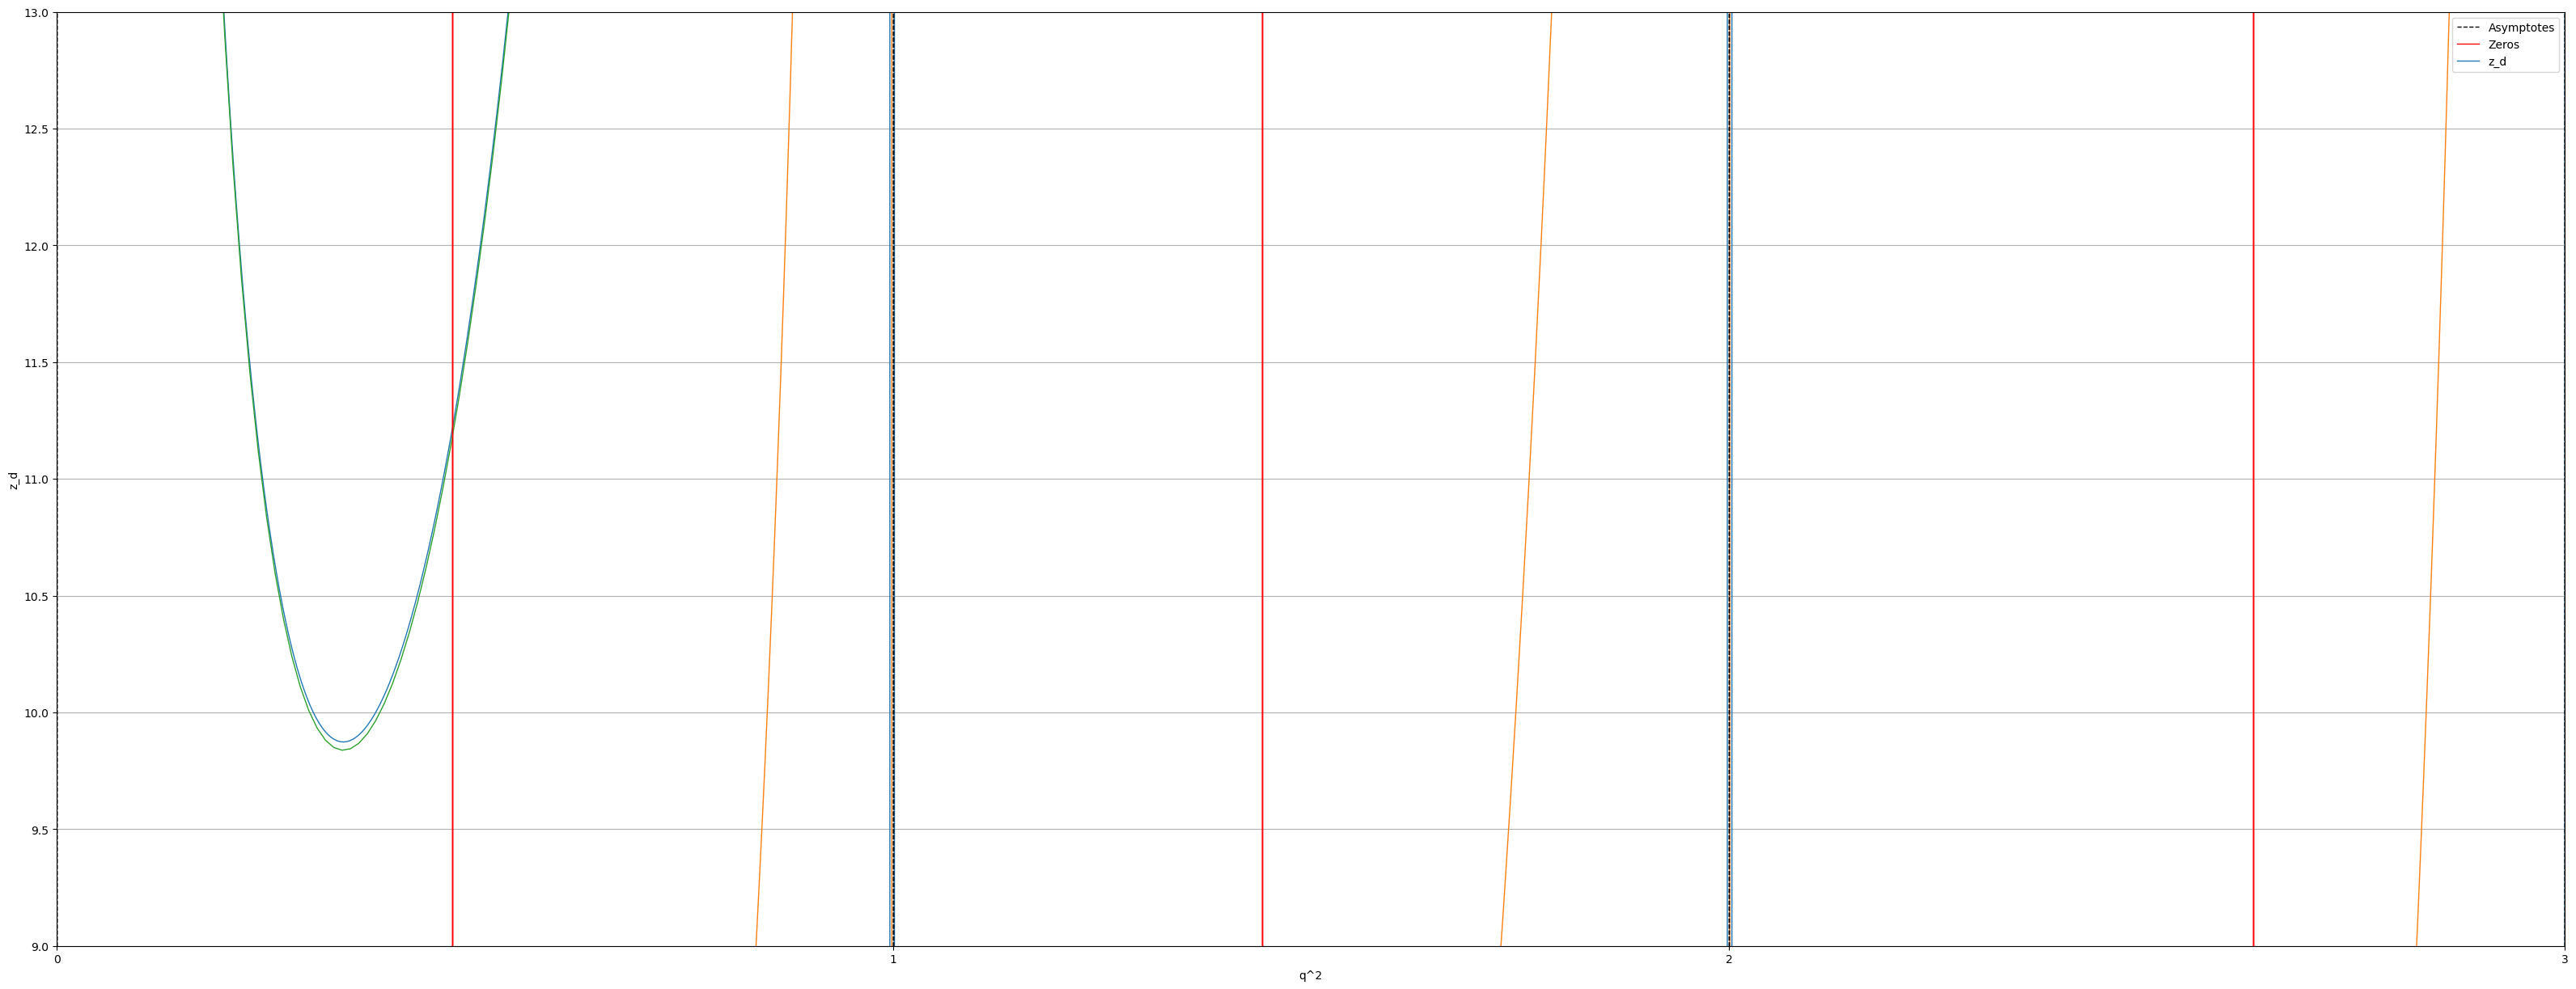

In [420]:
plt.figure(figsize = (40,15))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)
plot_nice(q_derivatives, accurate_deriv, asymptotes, zeros, d_vec)





plt.ylim(9,13)

plt.xlim(0,3)




plt.show()



In [1]:

import numpy as np
from zeta import *
from root_finding_final import *
from derivative import *
from tqdm import tqdm

In [2]:
def file_location(d_vec = np.array([0,0,1]), ML = 4): 
    d_vec = np.array(d_vec)
    directory = "roots_zeta/ML_{}/".format(ML)

    folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
    path = directory+ folder_name + "/data.npz"
    return path

In [3]:
d_vec = np.array([1,0,0])

In [4]:
data = np.load(file_location(d_vec))
zeta_d = data["z_d_results"]
asymptotes = data["asymptotes"]
zeros = data["zeros"]
q_2 = data["q_2"]





In [2]:

q_derivatives = np.linspace(0,3, 300)


#q_derivatives = q_2[:-1] + dx/2
accurate_deriv = np.zeros_like(q_derivatives)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx
#plt.ylim(-50,50)

#q_derivatives = q_2[:-1] + dx/2

for i in tqdm(range(len(q_derivatives))):
    accurate_deriv[i] = derivative(1, d_vec, q_derivatives[i], 0.1, 1e4)


NameError: name 'np' is not defined

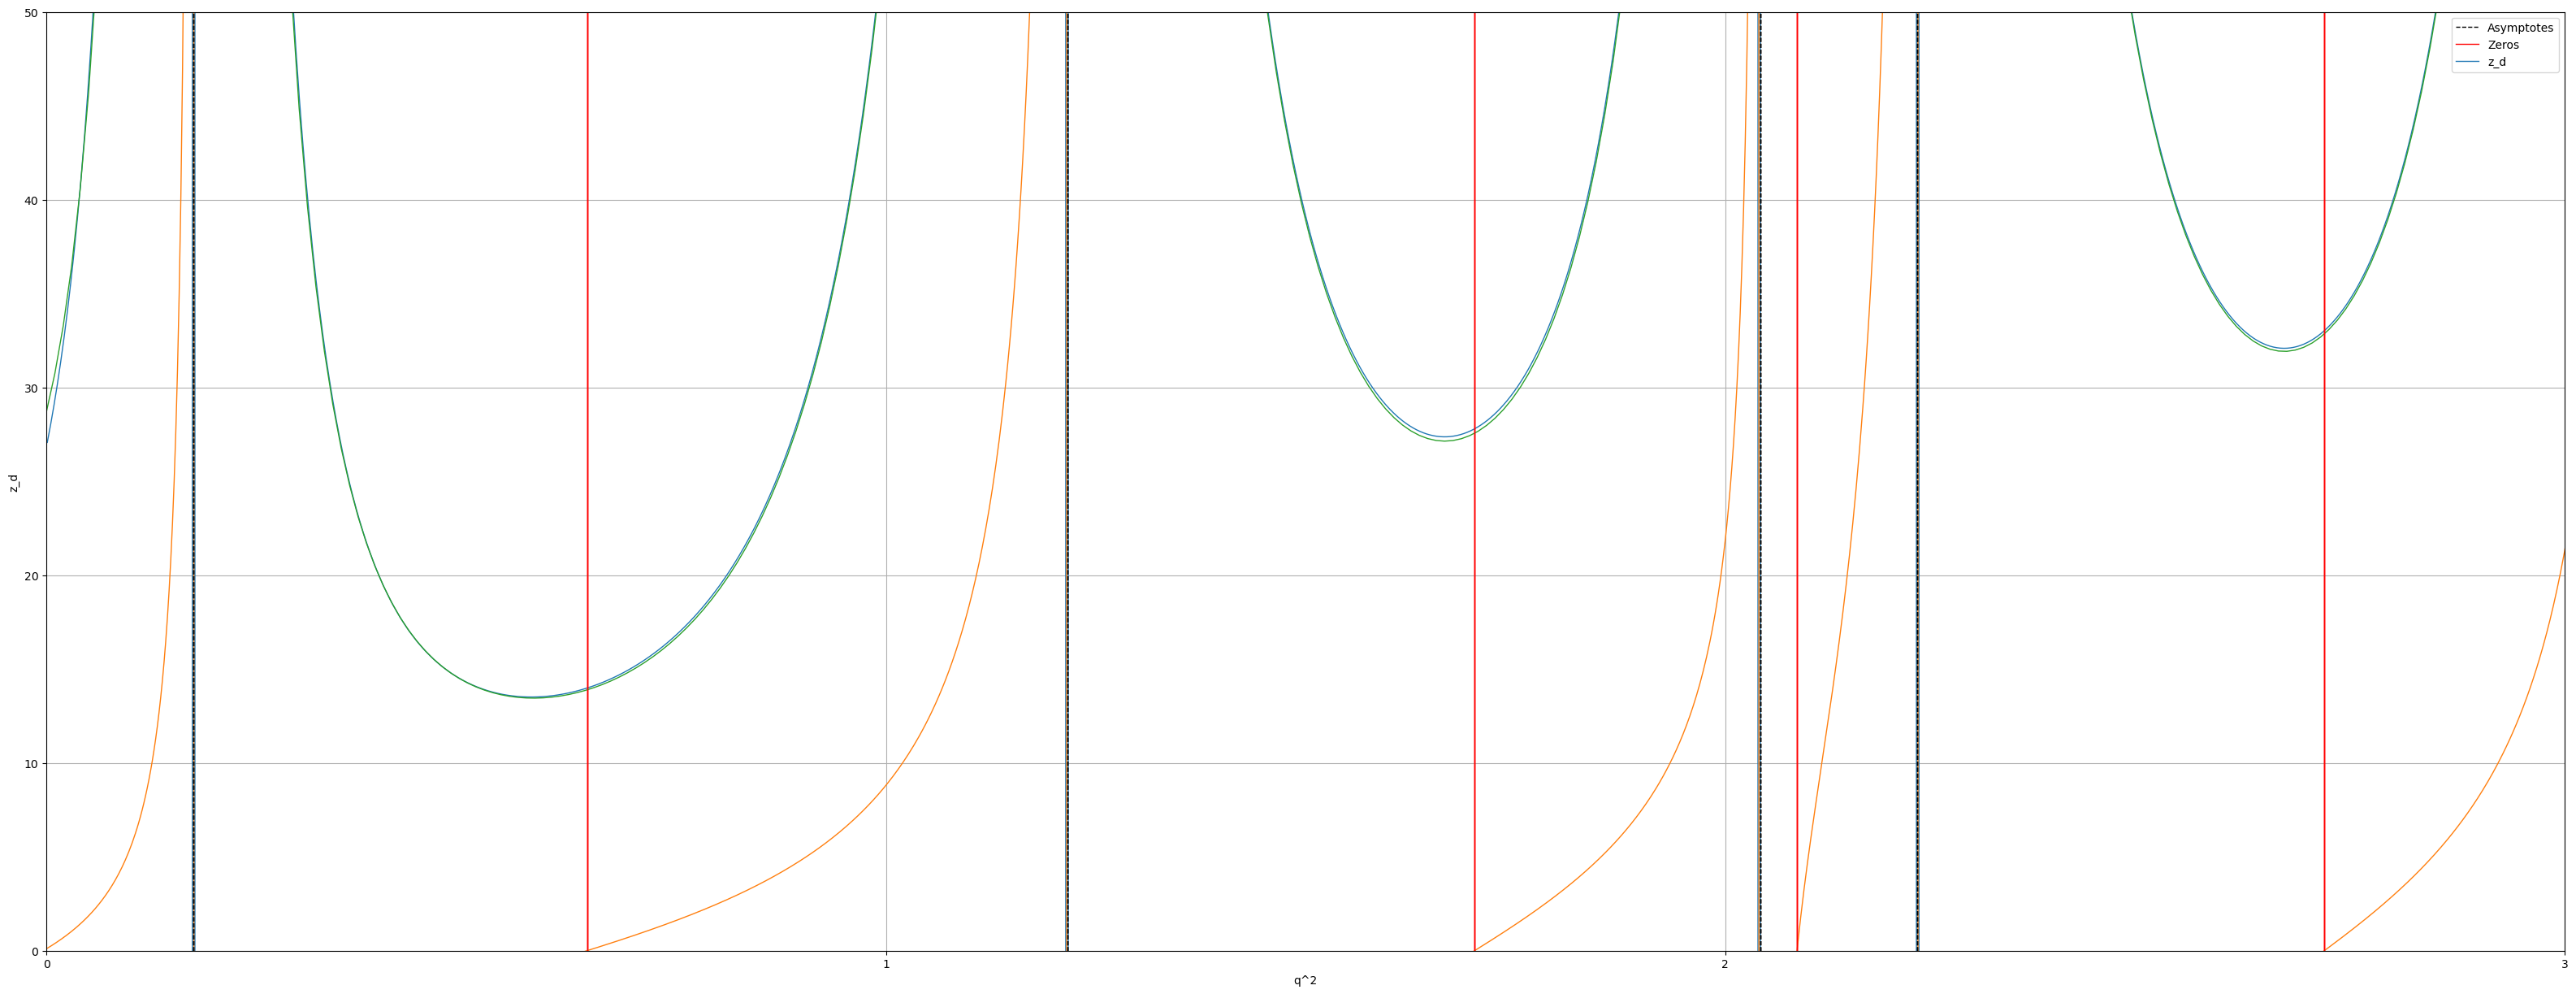

In [8]:
plt.figure(figsize = (40,15))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)
plot_nice(q_derivatives, accurate_deriv, asymptotes, zeros, d_vec)





plt.ylim(0,50)

plt.xlim(0,3)





plt.show()



In [13]:
Xi_sq = 1e2

g(2,1, zeros[0], 1,0,0, 0.1 , Xi_sq )

13.932560831777035

In [21]:
Xi_sq = np.linspace(2,5,20)

y = np.zeros_like([])
for  el in Xi_sq:
    y = np.append(y,g(2,1, 0, 1,0,0, 0.1 , 10**el ))

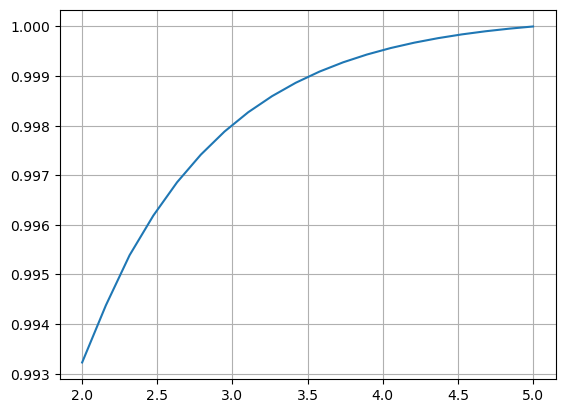

In [22]:
plt.grid()
plt.plot(Xi_sq, y/y[-1])

(0.995, 1.01)

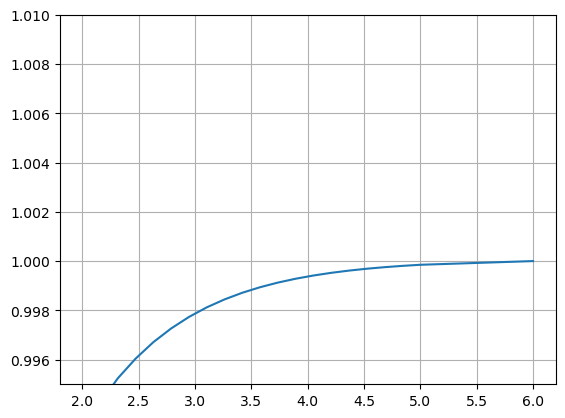

In [28]:
plt.grid()
plt.plot(Xi_sq, y/y[-1])
plt.ylim(0.995,1.01)

In [23]:
144.6486761251546

144.6269186378598

print(y[-1])

144.6269186378598


(0.0, 0.01)

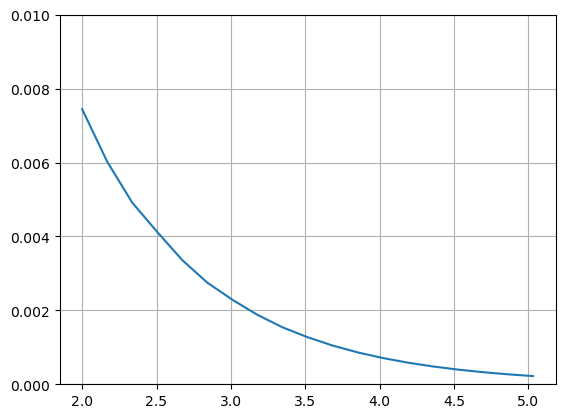

In [18]:
plt.plot(Xi_sq[:-1], np.diff(y/y[-1])/np.diff(Xi_sq))
plt.grid()
plt.ylim(0,0.01)

In [2]:
from zeta_large_cutoff import zeta as zeta_large

In [3]:
zeta_large(0.5, 1e7, 0.01, np.array([1,0,0]))

  5%|▌         | 7/128 [01:03<18:15,  9.05s/it]


KeyboardInterrupt: 

In [25]:
zeta(0.5, 5e4, 0.1, np.array([1,0,0]))

-1.9754243973136683

In [9]:
g(1,1,0.1,0,0,0,0,5e4)

0.0

In [ ]:
1667.4593678663311

In [ ]:

144.5875865910985
#144.5581053960615

144.55810539606165

In [1]:
from derivative import *

In [1]:

q_derivatives = np.linspace(0,0.1, 20)


#q_derivatives = q_2[:-1] + dx/2
accurate_deriv = np.zeros_like(q_derivatives)
#numerical derivative of zeta

dx = np.diff(q_2)
dy_dx = np.diff(zeta_d)/dx
#plt.ylim(-50,50)

#q_derivatives = q_2[:-1] + dx/2

for i in tqdm(range(len(q_derivatives))):
    accurate_deriv[i] = derivative(1, d_vec, q_derivatives[i], 0.1, 1e4)





NameError: name 'np' is not defined

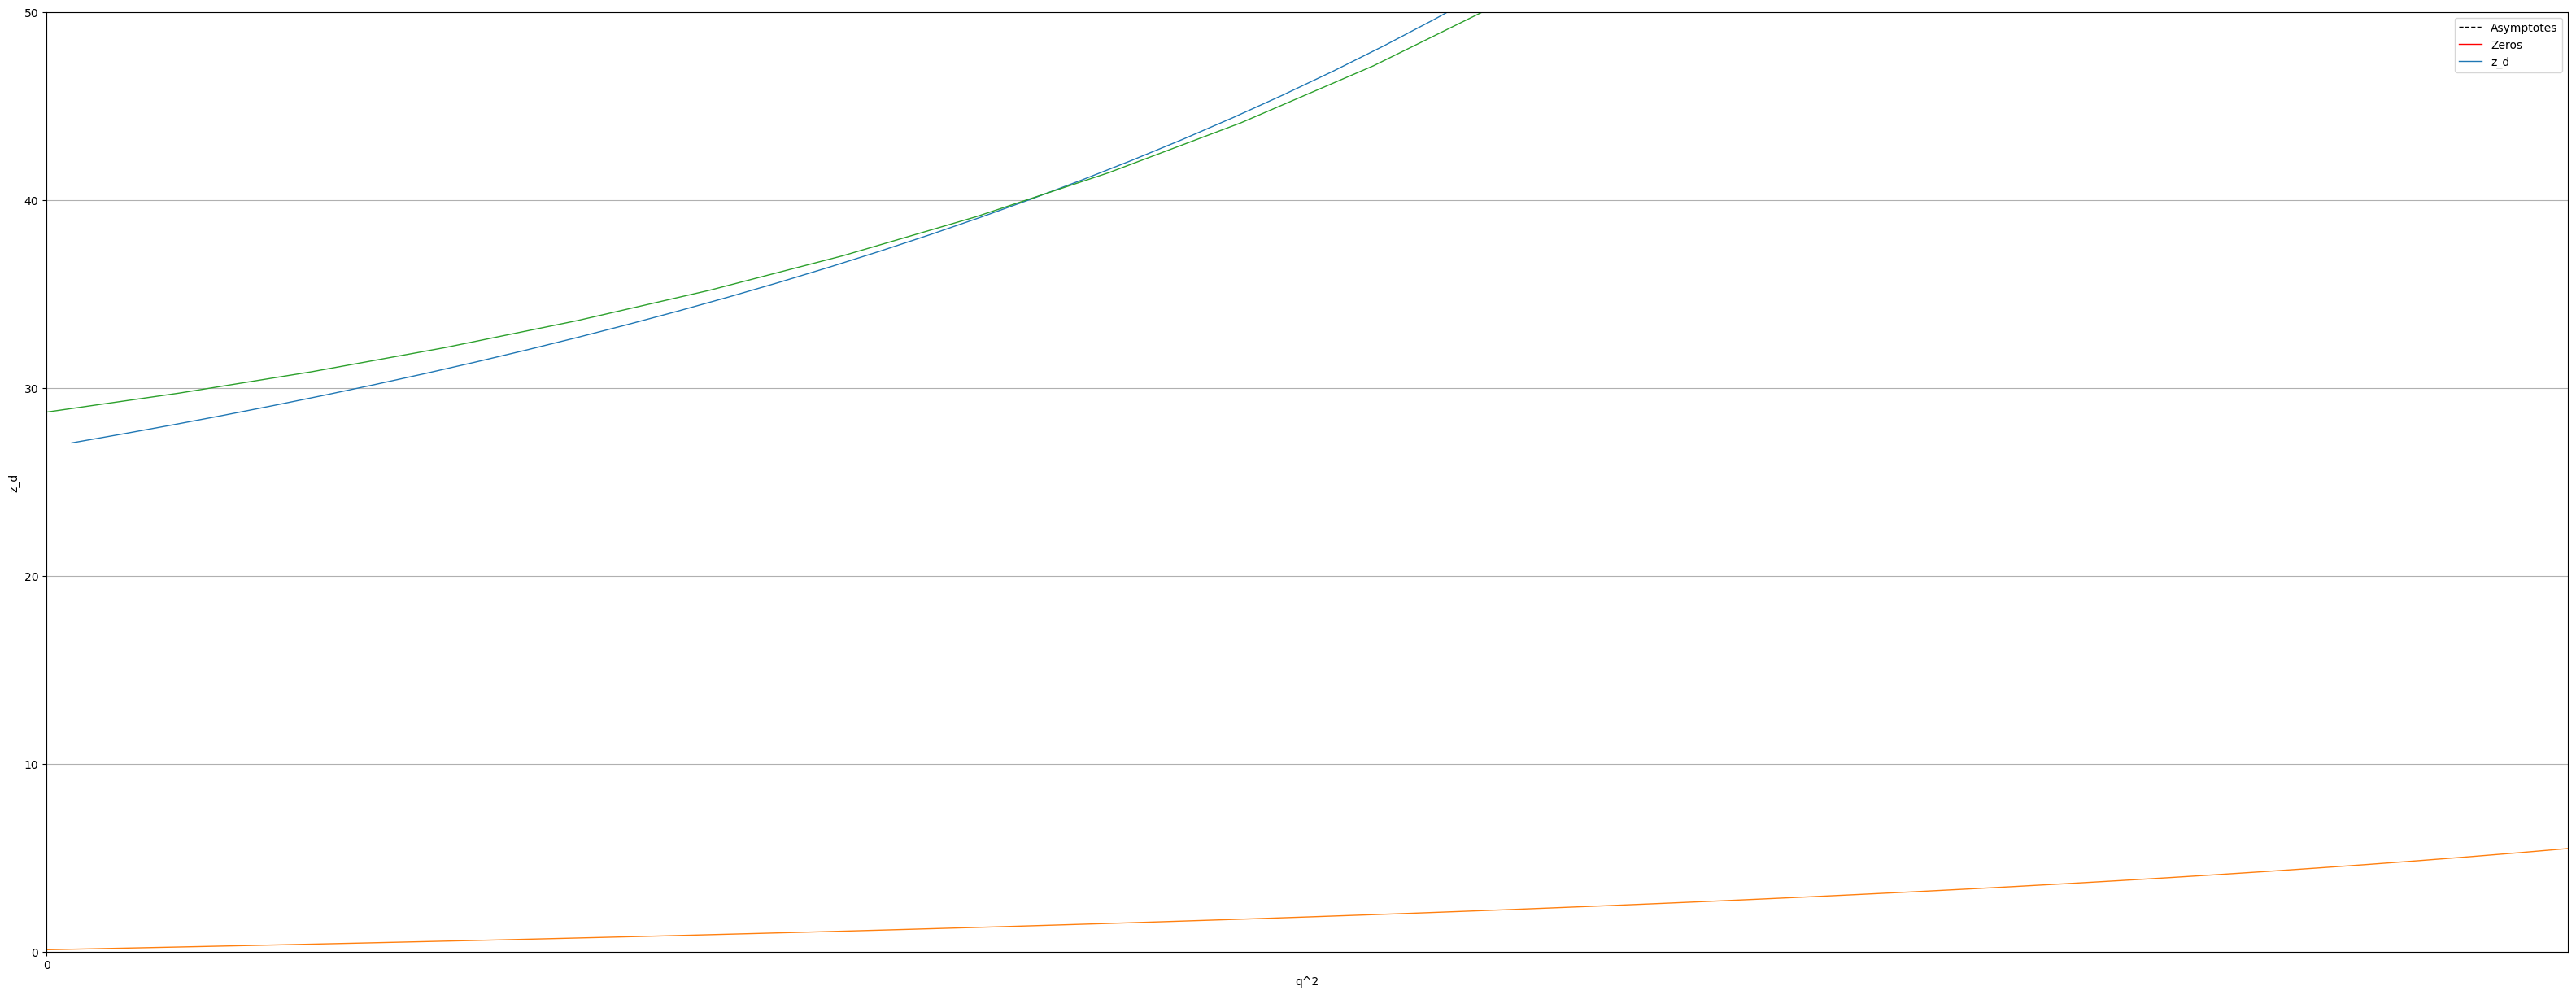

In [15]:
plt.figure(figsize = (40,15))
plot_nice(q_2[:-1] + dx/2, dy_dx, asymptotes, zeros, d_vec)

plot_nice(q_2, zeta_d, asymptotes, zeros, d_vec)
plot_nice(q_derivatives, accurate_deriv, asymptotes, zeros, d_vec)


plt.ylim(0,50)

plt.xlim(0,q_derivatives[-1])





plt.show()

